# 損失関数とGradient Descent (勾配降下法) による 学習

ここでは勾配降下法の感覚を掴むために簡単なプログラムを書いてみます。
効率が悪く、洗練されていないコードですが、まずは勾配降下法とはなにか、なぜ学習できるのかを見てみましょう。
その後、より大規模なニューラルネットワークでも効率的に学習できるコードにステップアップします。

## テストデータの用意

まずはテストデータを用意します。最初から複雑な問題にするとわかりづらくなるので

y = 4 x - 3

という簡単な関数を学習することにします。ここでは、 y = ax+b というモデルを考えて、aとbを学習によって求めます。つまり、最終的に a=4, b=-3 が求まればよいわけです。

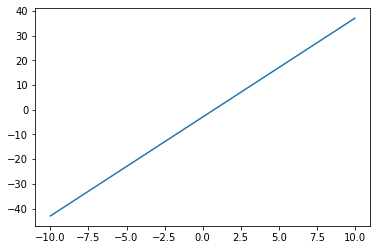

In [0]:
import numpy as np
import matplotlib.pyplot as plt

true_a = 4
true_b = -3
x = np.linspace(-10, 10, 20)

t = true_a * x + true_b

plt.plot(x, t)

上記は真のデータですが、実際のデータは有限個しか手に入りませんし、しかもノイズが乗るために以下のようなデータしかわかりません。
これが学習データです。今回は「平均が0、分散が2のガウスノイズが乗っているデータが20個手に入っている」状態です。

In [0]:
n_samples = 20
noise =  np.random.normal(loc=0.0, scale=2.0, size=n_samples)

def plot_samples(y=None):
    np.random.seed(0)
    _y = true_a * x + true_b + noise
    plt.plot(x, _y, marker='+', linestyle='None')

    if y is not None:
        plt.plot(x, y, marker='x')

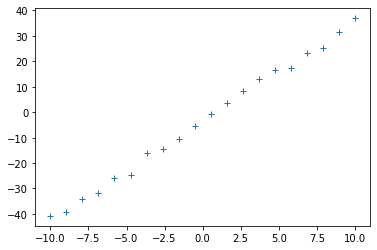

In [0]:
plot_samples()

いま、我々はa=4, b=-3という正解を知ってしまっていますが、これは知らないフリをして進めましょう。
y = a x + b というモデルを考えて、適当にaとbを設定してプロットしてみたら次のようになりました。
これではまだまだ乖離がありそうです。


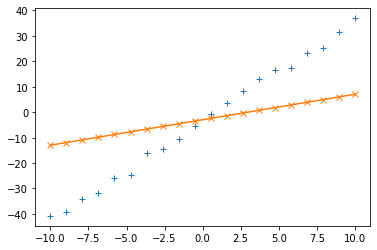

In [0]:

x = np.linspace(-10, 10, n_samples)

a = 1
b = -3
y = a * x + b
plot_samples(y)

## 損失関数

「乖離がありそう」では良し悪しを定量的に評価できません。暫定的に求めたaとbがどれくらい良いのか(悪いのか)を決めるのが**損失関数**です。
損失関数ではその名の通り、良さではなく悪さを指標にします。学習の際は損失がなるべく少なくなるようにする**最小化問題**として解くことになります。「良さを最大化すること」と「悪さを最小化すること」は同じですが、一般にこのような問題は「**最小化**問題」として解くので、ここでも「悪さ」を基準にしましょう。

### 平均二乗誤差

このような関数は無数にありますが、よく知られているものに平均二乗誤差(Mean Squared Error, MSE) があります。これは今の出力と学習データの出力の差を2乗したものの平均になります。

$$ E_{\mathrm{MSE}} = \frac{1}{N} \sum^N_{i=1} \left(t_i - y_i\right)^2 $$


そのままですね。ちなみに平均ではなく、総和にしても一応は損失関数として使えます(ゼロから作るディープラーニング 4.2.1章 ではこちらの定義が書いてあります)。

$$ E = \sum^N_{i=1} \left(t_i - y_i\right)^2 $$

が、データの個数に応じて値が変わってしまって扱いづらいので、平均で考えたほうが便利です。

また、(t-y)^2 の平均または総和にさらに0.5を掛ける定義もありますが、こちらのほうがあとあと計算が簡単になります（微分したときに簡単な式になる）。

$$E = \frac{1}{2N} \sum^N_{i=1} \left(t_i - y_i\right)^2 $$

とはいっても定数倍しているだけなので、最小値が0なのは変わりませんし、誤差が大きくなるほど大きい値になることも変わりません。

これを求める関数 `calc_mse` を作りましょう。

In [0]:
def calc_mse(t, y):
    mse = ((t - y) ** 2).mean()
    return mse

一応、どんな関数なのかを見てみます。

Text(0, 0.5, 'MSE')

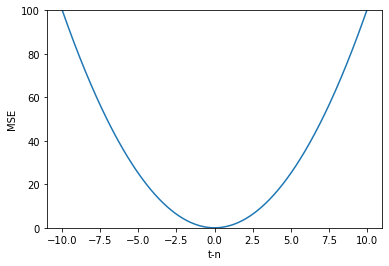

In [0]:
x = np.arange(-10, 10, 0.01)
plt.plot(x, x**2)
plt.ylim(0, 100)
plt.xlabel('t-n')
plt.ylabel('MSE')

正解 (a=4, b=-3) と、さきほど適当に決めた値 (a=1, b=-3) がどれくらい違うか求めてみましょう。

In [0]:
t = true_a * x + true_b + noise
y = a * x + b

print(calc_mse(t, y))

316.0306504461141


これで「どれくらい良いか」が定量的に評価できるようになりました。今は損失(loss)が316くらいありますが、あとはMSEが減るようにaとbを変更する、ということを繰り返すことによって良い解を求めます。これが学習です。

## それぞれのパラメータの変化を見る

ところで、aだけ、あるいはbだけをいろいろ変更したときに、MSEはどのように変わるでしょうか。これをチェックしてみましょう。

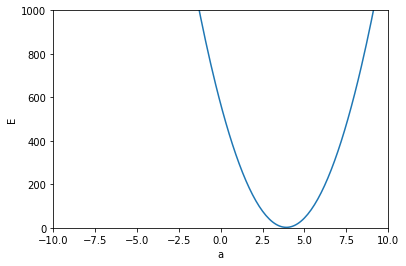

In [0]:
a_vals = [ ]
e_vals = [ ]

for a in np.arange(-10, 10, 0.1):
    b = true_b
    y = a * x + b
    e = calc_mse(t, y)

    a_vals.append(a)
    e_vals.append(e)

a_vals = np.array(a_vals)
e_vals = np.array(e_vals)
plt.xlim(-10, 10)
plt.ylim(0, 1000)
plt.xlabel('a')
plt.ylabel('E')
plt.plot(a_vals, e_vals)

これを見ると、たしかにa=4付近で損失が最小になっています。

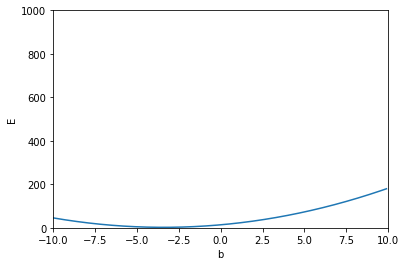

In [0]:
b_vals = [ ]
e_vals = [ ]

for b in np.arange(-10, 10, 0.1):
    a = true_a
    y = a * x + b
    e = calc_mse(t, y)

    b_vals.append(b)
    e_vals.append(e)

b_vals = np.array(b_vals)
e_vals = np.array(e_vals)
plt.xlim(-10, 10)
plt.ylim(0, 1000)
plt.xlabel('b')
plt.ylabel('E')
plt.plot(b_vals, e_vals)

bについても同様で、b=-3付近で損失が最小になっています。すこしずれていますが、これはデータ数が20個しかなくかつノイズが乗っているためです。

## 損失関数の形を見る

ここからが大事です。いま調整しないといけない変数（これをパラメータといいます）はaとbの2つです。
実際にはこれが10万〜1億くらいあるのですが、とりあえず今は2つです。
先程は「aだけ」「bだけ」を見ましたが、学習の際は結局aもbも両方同時に最適化しないといけないので、X軸にaの値、Y軸にbの値、そしてZ軸に損失(MSE)をプロットした3次元のグラフで可視化してみます。
左側の図が3次元プロット、右側の図は2次元に投影して等高線を表示したものです。

当然ですが、このようにプロットしてもやはり正解であるa=4, b=-3付近が一番低くなっている（へこんでいる）ことに注目してください。

(200, 200)
(200, 200)


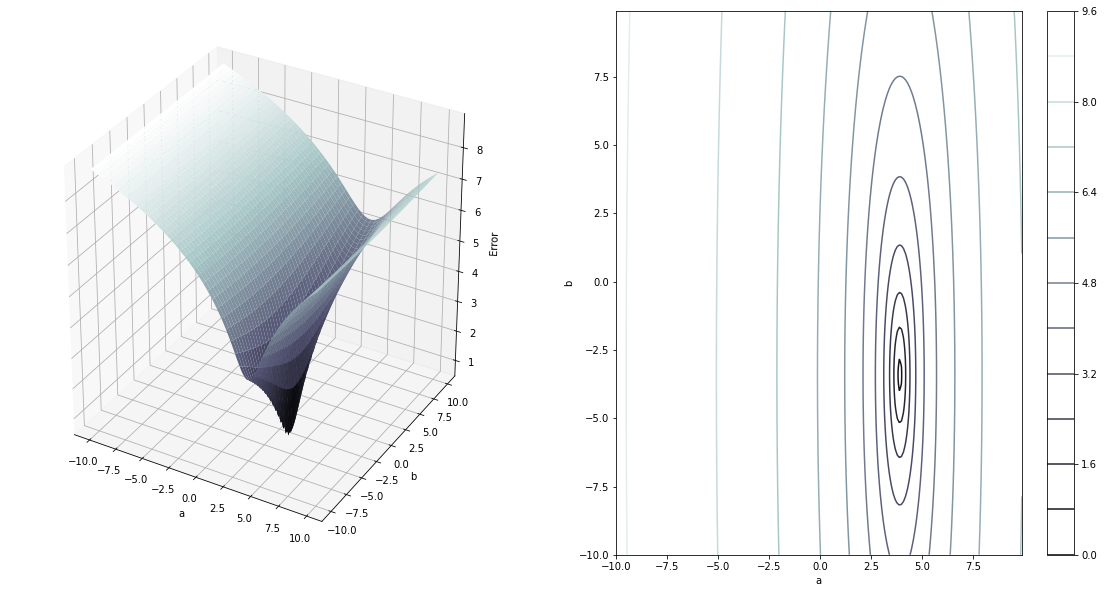

In [0]:
from matplotlib import cm

A, B = np.meshgrid(np.arange(-10, 10, 0.1),
                        np.arange(-10, 10, 0.1))

print(A.shape)
print(B.shape)

def f(arg):
    e = []
    for p in arg:
        a = p[0]
        b = p[1]
        y = a * x + b
        mse = calc_mse(t, y)
        e.append(mse)
    return np.array(e)

arg = np.c_[A.ravel(), B.ravel()]

#可視化の都合上 log スケールに変換していますが本質ではありません
E = np.log(f(arg).reshape(A.shape))

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(121, projection='3d')
ax.set_xlabel('a')
ax.set_ylabel('b')
ax.set_zlabel('Error')

ax.plot_surface(A, B, E, cmap=cm.bone)

ax = fig.add_subplot(122)
ax.set_xlabel('a')
ax.set_ylabel('b')
c = ax.contour(A, B, E, levels=10,  cmap=cm.bone)
fig.colorbar(c)

上記のグラフはもちろん、全体を通しても共通した重要な性質があります。
それは、この損失関数の形はかならずなめらかで微分可能であることです（というよりは、そうしなければなりません）。

## 勾配降下法

なぜ微分可能なことが重要なのでしょうか？
それは「勾配が計算可能」で「勾配降下法が使えるから」ためです。勾配降下法は上記の3次元グラフのどこかにボールを置くと、転がっていって一番低いところに向かっていくというイメージがわかりやすいかと思います。

ボールを転がすような処理を書く場合は、「今のボールの位置がどちらにどれくらい傾いているか」がわからないといけませんが、これは微分によって求められるというわけです。この傾きがわかりさえすれば、そちらのほう(正確にはその逆方向)に転がっていけばよいだけなのでとても簡単です。

## 数値微分による勾配降下法

とりあえずここでは数値微分を使って求めてみましょう（ゼロから作るディープラーニング4.3章にも解説があります）。
たとえば、関数f(x)の傾きgを知りたい場合は、$$ g=\frac{f(x+h)-f(x)}{h} $$ とし、hを0に近づければよいだけなので、実際にそれを計算してみればよいのです。ただ、h=0にしてしまうとゼロ除算になってしまって計算できませんし、hをあまりにも小さい値にしてしまうと丸め誤差の問題が起きてしまうのでやはり計算できません。とりあえずh=1e-4(0.0001)くらいにして計算してみましょう。

最初にボールを置く場所は適当に a=-8, b=3 としてみました。この初期位置は重要なのですが、今は適当でよいです。あとは a, b それぞれに対して勾配を計算して、それとは逆方向にボールを移動させます。なぜ逆方向なのかというと、勾配は「上がる方向」を指しているので、下がるにはその逆方向に移動しないといけないからです。

### 学習率について

ボールの位置を変更するときに、aを更新するときは 0.01を、bを更新するときは 0.2 を掛けていますが、これは学習率と呼ばれ、`α`, `alpha` や `lr` (learning rate の略) と表記されます。学習率が高すぎるとボールの動きが激しすぎて振動してしまうので、適当な小さい値を掛ける必要があります（実際に試してみてください）。

今回はaとbの学習率を別々に設定していますが、これは結果がきれいに見えるようにしたためです。普通は数十万、数百万のパラメータに対して別々の学習率を設定するわけにはいかないので、同じ値(〜0.1くらい)を設定します。

この学習率、あるいは勾配降下法全体も、いろいろな話があるのですが、いったん今は気にしないことにしましょう。

a=-8.0, b=3.0
a=0.7825815586256795, b=0.43284563737688586
a=3.0937872320278075, b=-1.1074469788782153
a=3.7019992513391458, b=-2.031622548713699
a=3.8620550458941487, b=-2.5861278906039757
a=3.904174991829297, b=-2.9188310957374313
a=3.915259188128058, b=-3.118453018814307
a=3.9181760818908966, b=-3.2382261726594557
a=3.918943685512362, b=-3.3100900649706304
a=3.9191456864656598, b=-3.3532084003532496


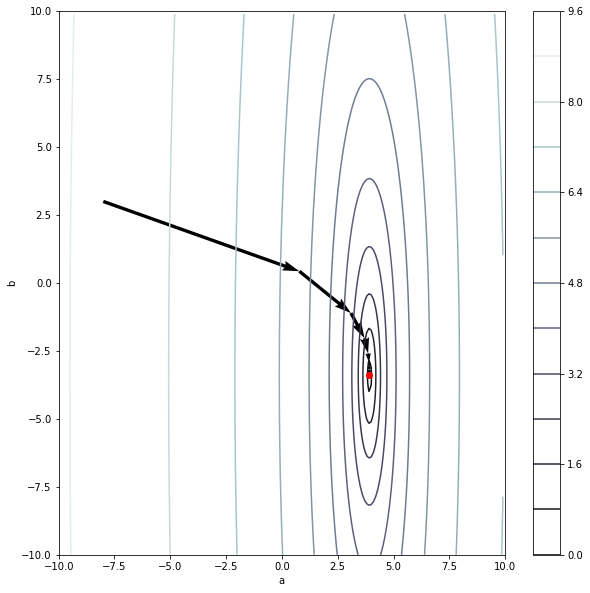

In [0]:
a = -8.0
b = 3.0
h = 0.0001

a_history = [ ]
b_history = [ ]

for i in range(10):
    print(f'a={a}, b={b}')

    y = a * x + b
    f1 = calc_mse(t, y)
    y = (a+h) * x + b
    f2 = calc_mse(t, y)
    g_a = (f2 - f1) / h 

    y = a * x + b
    f1 = calc_mse(t, y)
    y = a * x + (b+h)
    f2 = calc_mse(t, y)
    g_b = (f2 - f1) / h 

    a_history.append(a)
    b_history.append(b)

    # aとbで異なる学習率を設定しているが
    # 今回の出力がきれいになるように調整したためで
    # 普通は同じ値 (〜0.1 くらい) を使う
    a -= 0.01 * g_a
    b -= 0.2 * g_b


aa = np.array(a_history)
bb = np.array(b_history)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.set_xlabel('a')
ax.set_ylabel('b')
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
c = ax.contour(A, B, E, levels=10,  cmap=cm.bone)
ax.plot([a], [b], 'ro', zorder=10)
ax.quiver(aa[:-1], bb[:-1], aa[1:]-aa[:-1], bb[1:]-bb[:-1], scale_units='xy', angles='xy', scale=1)
fig.colorbar(c)

実際に計算してみたらこんな感じになりました。もともとは a=-8, b=3からスタートしているのに、何度か計算を繰り返すとa=3.8, b=-1.8くらいになりました。これは正解と比較的近い値です。

ここでは非常に簡単な問題と簡単なモデルしか使っていませんが、「損失関数を定義」して「勾配を求める」ことができさえすれば、「勾配降下法で最適なパラメータを求められる」という感覚がつかめたかと思います。

## 今回の手法の問題点

今回は y = ax+b というモデルを使いましたが、これは1入力のニューロンを1つだけ使っている状態です。実際には膨大な数のニューロンがあるので、ここで書いてきたようなコードでは煩雑すぎます。これについてはきちんと行列計算に落とし込んでいきましょう。

また、数値微分にも問題があります。数値微分はわかりやすくてプログラムも簡単なのですが、どうしても誤差が大きめになってしまいます。また、「実際にパラメータを1つだけ変更してみて損失を計算する」という処理をパラメータの数だけ繰り返してようやくパラメータを1回更新する、という処理になるためにパラメータ数が多いと処理時間が膨大になってしまい非現実的です。

最後に、局所解の問題があります。今回は問題が簡単だったので「低いところ」が1つしかない損失関数になっていました。よって、「ボールを転がして止まったところが解」としてよいのですが、このような谷が2つ以上ある場合は話が変わってきます。ボールを転がして止まったところが一番低いかどうかを保証できないのです。あくまでもそれは「局所的には一番低い」というだけで、「全体で見たときにもやはり一番低い」とは限りません。